# Implementación de PCA en NumPy

## Objetivos
* Implementación de PCA en NumPy paso a paso
* Comparación de resultados con Scikit-learn

## Implementación

1. Dado un dataset $X \in \mathbb{R}^{n, d}$, con $n$ muestras y $d$ features, queremos reducir sus dimensiones a $m$. Para ello, el primer paso es centrar el dataset (Hint: usen np.mean)

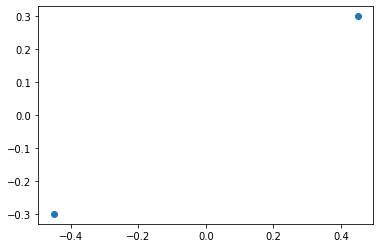

In [2]:
import numpy as np
from matplotlib import pyplot as plt
X = np.array([[0.8, 0.7], [-0.1,0.1]])
X_centrado = X - X.mean(axis=0)
x,y = zip(*X_centrado)
plt.scatter(x,y)
plt.show()

2. Obtener la matriz de covarianza de $X^T$, revisar en la teoría por qué utilizamos la transpuesta. Buscar en la documentación de NumPy qué funciones se pueden utilizar.

In [3]:
cov_matrix = np.cov(X_centrado.T)

3. Calcular los autovalores y autovectores de la matriz de covarianza. Revisar la documentación de NumPy.

In [4]:
w, v = np.linalg.eig(cov_matrix)

In [5]:
w

array([5.85000000e-01, 5.18104078e-18])

In [6]:
v

array([[ 0.83205029, -0.5547002 ],
       [ 0.5547002 ,  0.83205029]])

4. Ordernar los autovectores en el sentido de los autovalores decrecientes, revisar la teoría de ser necesario.

In [7]:
np.argsort(w)

array([1, 0], dtype=int64)

In [8]:
v = v[np.argsort(w)[::-1]]
w = w[np.argsort(w)[::-1]]
w

array([5.85000000e-01, 5.18104078e-18])

5. Proyectar el dataset centrado sobre los $m$ autovectores más relevantes (Hint: usen np.dot).

In [9]:
proyec = np.dot(v, X_centrado.T)

6. Consolidar los pasos anteriores en una función o clase PCA.

In [10]:
def pca_numpy(X, numero_componentes):
    X_centrado = X - X.mean(axis=0)
    cov_matrix = np.cov(X_centrado.T)
    w, v = np.linalg.eig(cov_matrix)
    v = v[np.argsort(w)[::-1]]
    proyec = X_centrado.dot(v)
    return w[:numero_componentes], proyec[:numero_componentes]

7. Comparar los resultados obtenidos con el modelo de PCA implementado en Scikit-learn ([ver documentación](https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html)). Tomar como dataset:

$X=\begin{bmatrix}
0.8 & 0.7\\
0.1 & -0.1
\end{bmatrix}$

Se debe reducir a un componente. Verificar los resultados con np.testing.assert_allclose

In [11]:
from sklearn.decomposition import PCA 
from sklearn.preprocessing import StandardScaler

In [12]:
x_std = StandardScaler(with_std=False).fit_transform(X)

In [13]:
pca =PCA(n_components=2)

In [14]:
pca_sci = pca.fit_transform(x_std)
pca_sci

array([[ 5.40832691e-01,  2.47900855e-17],
       [-5.40832691e-01,  2.47900855e-17]])

In [15]:
v, w = pca_numpy(X, 2)

In [16]:
w

array([[ 5.40832691e-01,  8.32667268e-17],
       [-5.40832691e-01,  0.00000000e+00]])

In [17]:
pca_sci - w

array([[ 0.00000000e+00, -5.84766413e-17],
       [ 0.00000000e+00,  2.47900855e-17]])

In [18]:
print(np.testing.assert_allclose(w, pca_sci,atol=1e-07))

None


# The Iris Dataset

In [19]:
from sklearn import datasets
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D

In [20]:
iris = datasets.load_iris()

In [21]:
x = iris.data # tomo los datos
y = iris.target #tomo las etiquetas

In [22]:
iris_x_std = StandardScaler(with_std=False).fit_transform(x)

In [23]:
iris_pca =PCA(n_components=2)
iris_pca_sci = iris_pca.fit_transform(iris_x_std)

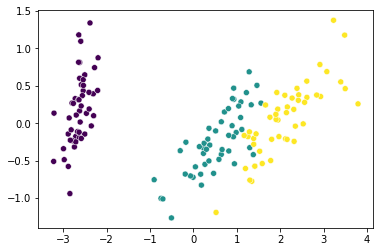

In [24]:
sns.scatterplot(x=iris_pca_sci[:, 0], y=iris_pca_sci[:, 1], c=y)
plt.show()

# Wine dataset

In [25]:
wine = datasets.load_wine()
y_wine = wine.target

In [26]:
wine_x_std = StandardScaler(with_std=False).fit_transform(wine.data)

In [27]:
pca_2 = PCA(n_components=13).fit(wine_x_std)

In [28]:
pca_2 = PCA(n_components=2).fit(wine_x_std)
pca_2 = pca_2.transform(wine_x_std)

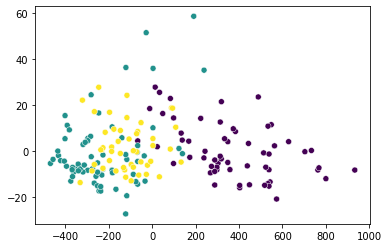

In [29]:
sns.scatterplot(x=pca_2[:, 0], y=pca_2[:, 1], c=y_wine)
plt.show()

In [30]:
pca_3 = PCA(n_components=3).fit(wine_x_std)
pca_3 = pca_3.transform(wine_x_std)

<IPython.core.display.Javascript object>


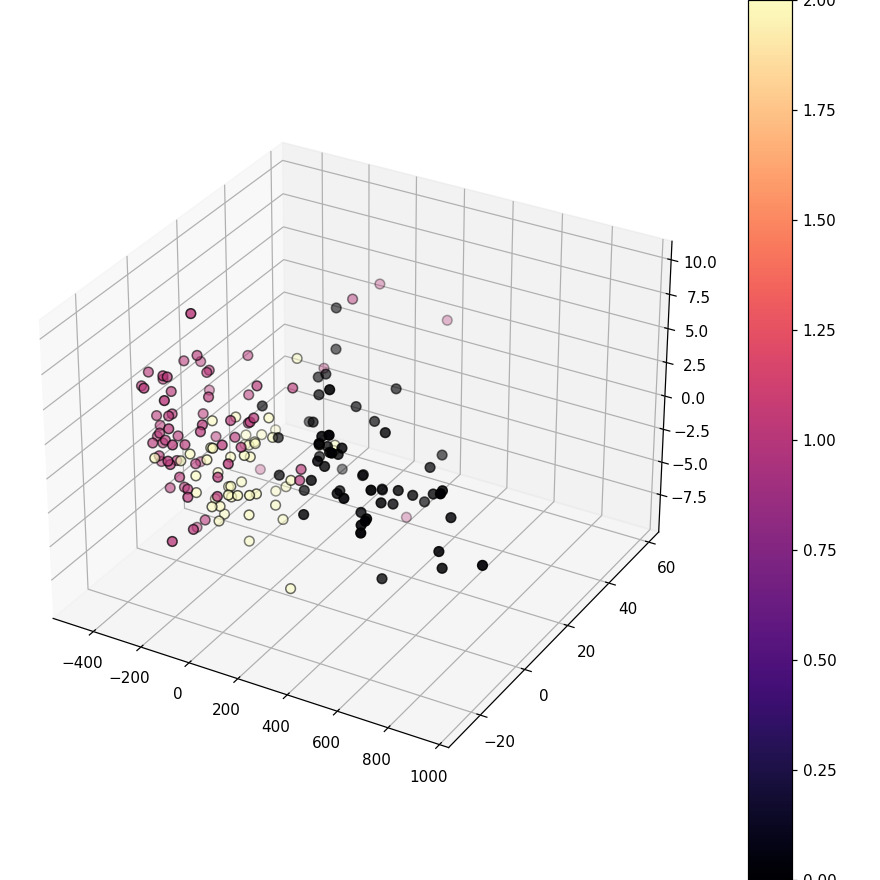

In [43]:
%matplotlib notebook
fig = plt.figure(1, figsize=(8, 8))
ax = Axes3D(fig, auto_add_to_figure=False)
fig.add_axes(ax)
p = ax.scatter(pca_3[:, 0], pca_3[:, 1], pca_3[:, 2], c=y_wine,
           cmap=plt.cm.magma, edgecolor='k', s=40)
plt.colorbar(p)
plt.show()